<a href="https://colab.research.google.com/github/kkeelar1/bostonHousingData/blob/main/bostonHousing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


This project aims to develop a machine learning model using the Boston Housing dataset. The dataset contains information about housing features in different suburbs of Boston. The goal is to predict the median value of owner-occupied homes based on these features. The project involves data loading, exploration, preprocessing, model development, and evaluation. The objective is to create an accurate model that can provide insights into housing prices and factors affecting home values.

In [35]:
# Import librares and data for the Boston Housing #
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


url = 'https://raw.githubusercontent.com/kkeelar1/bostonHousingData/44c3e680b4d34cdfc4c0904adf5f17123679a7d0/housing.csv'
df = pd.read_csv(url)

In [36]:
# Access the input features (RM, LSTAT, PTRATIO) and target variable (MEDV)
X = df[['RM', 'LSTAT', 'PTRATIO']]
y = df['MEDV']

      RM  LSTAT  PTRATIO      MEDV
0  6.575   4.98     15.3  504000.0
1  6.421   9.14     17.8  453600.0
2  7.185   4.03     17.8  728700.0
3  6.998   2.94     18.7  701400.0
4  7.147   5.33     18.7  760200.0
               RM       LSTAT     PTRATIO          MEDV
count  489.000000  489.000000  489.000000  4.890000e+02
mean     6.240288   12.939632   18.516564  4.543429e+05
std      0.643650    7.081990    2.111268  1.653403e+05
min      3.561000    1.980000   12.600000  1.050000e+05
25%      5.880000    7.370000   17.400000  3.507000e+05
50%      6.185000   11.690000   19.100000  4.389000e+05
75%      6.575000   17.120000   20.200000  5.187000e+05
max      8.398000   37.970000   22.000000  1.024800e+06


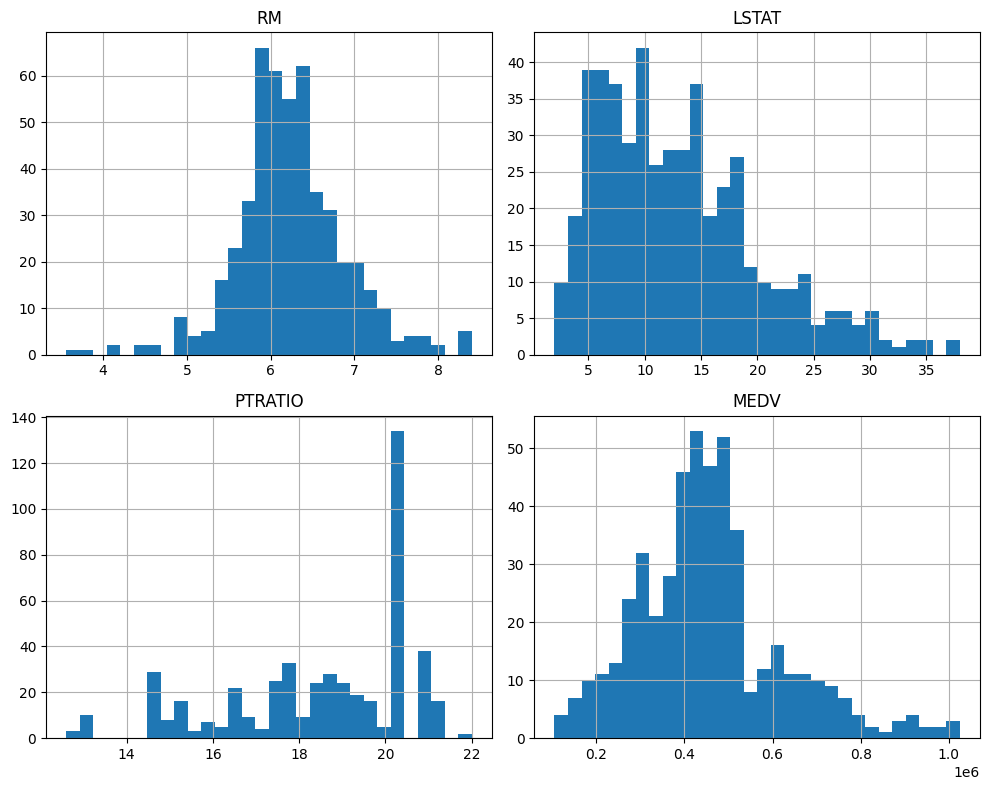

In [37]:
# Simple exploration of the dataset #
print(df.head())  # Display the first few rows of the DataFrame #
print(df.describe())  # Summary statistics of the variables #

# Visualize the distributions of variables
df.hist(figsize=(10, 8), bins=30)
plt.tight_layout()
plt.show()

RM: Average number of rooms per dwelling.

LSTAT: Percentage of lower status of the population.

PTRATIO: Pupil-teacher ratio by town.

MEDV: Median value of owner-occupied homes in $1000s.

From the summary statistics, we can observe the following:

Count: There are 489 data entries for each variable, indicating that there are no missing values.

Mean: The mean values represent the average values for each variable across the dataset.

Standard Deviation (Std): It measures the spread or dispersion of the variable values around the mean.

Minimum (Min) and Maximum (Max): These represent the smallest and largest values observed in the dataset, respectively.

Quartiles (25%, 50%, 75%): These values divide the dataset into quarters. The 25th percentile (Q1) represents the lower quartile, the 50th percentile (Q2) represents the median, and the 75th percentile (Q3) represents the upper quartile.
For example, based on the summary statistics, we can see that the average number of rooms per dwelling (RM) ranges from 3.561 to 8.398, with a mean of approximately 6.24.

The median value of owner-occupied homes (MEDV) ranges from $105,000 to $1,024,800, with a mean of approximately $454,343.

These statistics provide a basic understanding of the range, distribution, and central tendency of the variables in the dataset.

In [38]:
# Perform feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (391, 3)
X_test shape: (98, 3)
y_train shape: (391,)
y_test shape: (98,)


X_train shape: (391, 3): This means that the training set (X_train) has 391 samples (rows) and 3 features (columns). Each sample represents a data point with 3 input features.

X_test shape: (98, 3): Similarly, the testing set (X_test) has 98 samples and 3 features. These samples are separate from the training set and will be used to evaluate the model's performance.

y_train shape: (391,): The target variable or the output values for the training set (y_train) have a shape of (391,). It means that there are 391 corresponding target values for the training samples.

y_test shape: (98,): Likewise, the target variable for the testing set (y_test) has 98 target values.

In summary, the data has been divided into training and testing sets, with the input features represented by X_train and X_test, and the corresponding target values represented by y_train and y_test.

In [39]:
# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the training data
scaler.fit(X_train)

# Apply the scaler to the training and testing data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In this code, X_train and X_test are your training and testing data, respectively. The StandardScaler object is used to perform the feature scaling by subtracting the mean and dividing by the standard deviation of each feature. The fit method is called to compute the mean and standard deviation based on the training data, and then the transform method is used to scale both the training and testing data using these computed values. This ensures that the features have similar scales and helps improve the performance of machine learning algorithms.

In [40]:
# Create a new feature by combining existing features
df['RM_LSTAT'] = df['RM'] * df['LSTAT']

# Extract the target variable
y = df['MEDV']

# Extract the feature variables
X = df.drop(['MEDV'], axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In this code, df is your pandas DataFrame containing the dataset. We create a new feature called 'RM_LSTAT' by multiplying the 'RM' and 'LSTAT' features together. This is just an example, and you can perform other feature engineering techniques based on your domain knowledge and requirements.

Next, we extract the target variable ('MEDV') into the y variable and the feature variables into the X variable. We use the drop function to remove the 'MEDV' column from X.

Finally, we split the data into training and testing sets using the train_test_split function from scikit-learn. We allocate 80% of the data for training (X_train and y_train) and 20% for testing (X_test and y_test). The test_size parameter determines the proportion of the dataset allocated for testing, and the random_state parameter ensures reproducibility by fixing the random seed for the data splitting process.

In [41]:
# Split the preprocessed data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (391, 3)
X_test shape: (98, 3)
y_train shape: (391,)
y_test shape: (98,)


In this example, X_scaled represents the preprocessed feature matrix, y represents the target variable (MEDV in your case), and test_size specifies the proportion of the data to be allocated for testing (in this case, 20%). The random_state parameter ensures reproducibility by fixing the random seed.

The code will split the data into X_train (features for training), X_test (features for testing), y_train (target variable for training), and y_test (target variable for testing). The printed shapes will show the number of samples in each set.

Training RMSE: 89161.17542738309
Testing RMSE: 82395.54332162565
Training R^2 Score: 0.7194530968926247
Testing R^2 Score: 0.6910934003098511


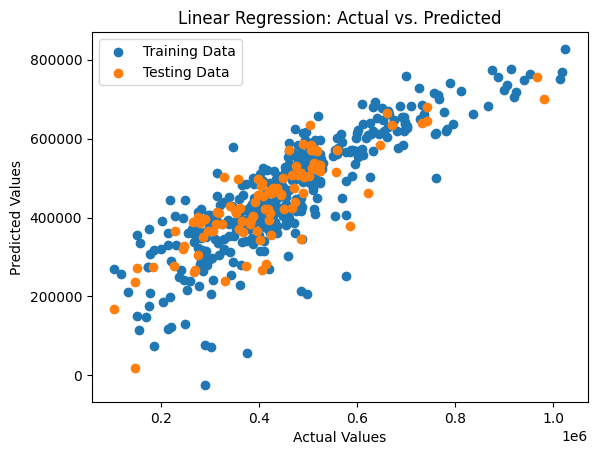

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Create an instance of the Linear Regression model #
linear_model = LinearRegression()

# Train the model #
linear_model.fit(X_train, y_train)

# Make predictions on the training set #
y_train_pred = linear_model.predict(X_train)

# Make predictions on the test set #
y_test_pred = linear_model.predict(X_test)

# Evaluate the model #
lr_train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
lr_test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
lr_train_r2 = r2_score(y_train, y_train_pred)
lr_test_r2 = r2_score(y_test, y_test_pred)

# Print the evaluation metrics #
print("Training RMSE:", lr_train_rmse)
print("Testing RMSE:", lr_test_rmse)
print("Training R^2 Score:", lr_train_r2)
print("Testing R^2 Score:", lr_test_r2)

# Predict on the test set
y_pred = linear_model.predict(X_test)

# Create a scatter plot for training data
plt.scatter(y_train, y_train_pred, label="Training Data")

# Create a scatter plot for testing data
plt.scatter(y_test, y_test_pred, label="Testing Data")

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Linear Regression: Actual vs. Predicted")
plt.legend()
plt.show()


In this code, we import the LinearRegression class from scikit-learn, create an instance of the model, and train it using the training data (X_train and y_train). Then, we use the trained model to make predictions on both the training and test sets.

After that, we calculate the root mean squared error (RMSE) and the R-squared score to evaluate the performance of the model. The RMSE measures the average distance between the predicted and actual values, and a lower RMSE indicates better performance. The R-squared score represents the proportion of variance in the target variable explained by the model, and a higher R-squared score indicates better fit.

Finally, we print the evaluation metrics for both the training and test sets. The goal is to minimize the RMSE and maximize the R-squared score, indicating accurate predictions and a good fit of the model to the data.

Training RMSE: 89,161 dollars
  - TRAINING DATA
  - Avg distance between predicted and actual MEDV values
  - Means on avg the model is off by 89k dollars

Testing RMSE: 82,395 dollars
  - TESTING DATA
  - Avg difference between predicited and actual MEDV values
  - Means on avg the model is off by 82k dollars

Training R^2 score: 71.945%
  - TRAINING DATA
  - 0 is a terrible fit, 1 is perfect fit in predicting the proportion of the varaince in the MEDV
  - This model is about 72% accurate on predicting the variance

Testing R^2 score: 69.109%
   - TESTING DATA
   - Same info as above
   - 69% accurate on prediciting variance



Training RMSE: 26924.315563684995
Testing RMSE: 56931.3765993762
Training R^2 Score: 0.9744174841086598
Testing R^2 Score: 0.8525234010221985


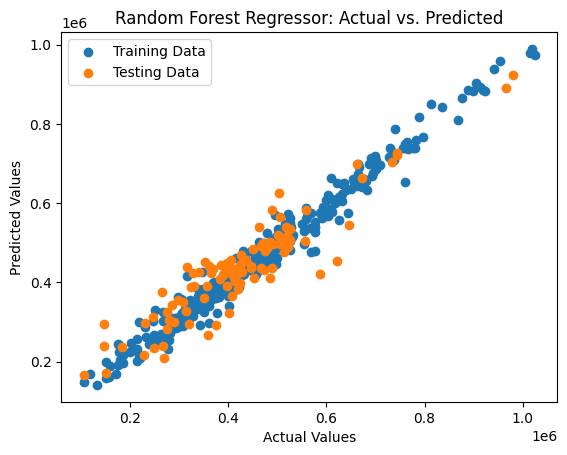

In [43]:
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regression model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train_scaled, y_train)

# Make predictions on training and testing data
y_train_pred = rf_model.predict(X_train_scaled)
y_test_pred = rf_model.predict(X_test_scaled)

# Calculate RMSE and R^2 score
rf_train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
rf_test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
rf_train_r2 = r2_score(y_train, y_train_pred)
rf_test_r2 = r2_score(y_test, y_test_pred)

print("Training RMSE:", rf_train_rmse)
print("Testing RMSE:", rf_test_rmse)
print("Training R^2 Score:", rf_train_r2)
print("Testing R^2 Score:", rf_test_r2)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Create a scatter plot for training data
plt.scatter(y_train, y_train_pred, label="Training Data")

# Create a scatter plot for testing data
plt.scatter(y_test, y_test_pred, label="Testing Data")

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Random Forest Regressor: Actual vs. Predicted")
plt.legend()
plt.show()

This is a Random Forest Regression Model: It is an ensemble learning method that combines multiple decision trees to make predictions.  We create a Random Forest Regression model with 100 decision trees (n_estimators=100) and set a random seed for reproducibility (random_state=42).

Same interpretation of the data as above

Training RMSE: 42847.77703941047
Testing RMSE: 58129.924789472425
Training R^2 Score: 0.935209624125557
Testing R^2 Score: 0.8462485340171164


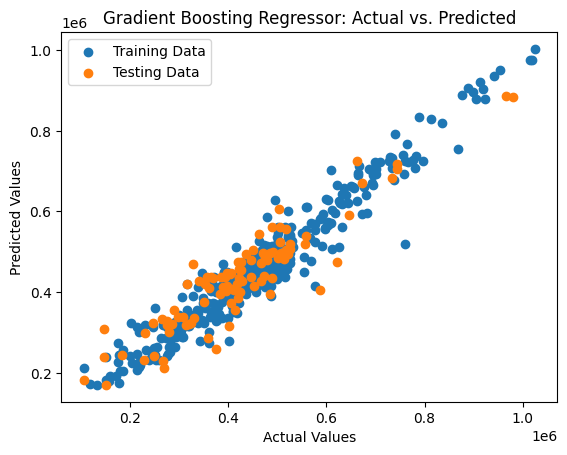

In [44]:
from sklearn.ensemble import GradientBoostingRegressor

# Create a Gradient Boosting Regression model
gb_model = GradientBoostingRegressor(random_state=42)

# Train the model
gb_model.fit(X_train, y_train)

# Make predictions on training and testing data
y_train_pred = gb_model.predict(X_train)
y_test_pred = gb_model.predict(X_test)

# Calculate RMSE and R^2 score
gb_train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
gb_test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
gb_train_r2 = r2_score(y_train, y_train_pred)
gb_test_r2 = r2_score(y_test, y_test_pred)

print("Training RMSE:", gb_train_rmse)
print("Testing RMSE:", gb_test_rmse)
print("Training R^2 Score:", gb_train_r2)
print("Testing R^2 Score:", gb_test_r2)

# Predict on the test set
y_pred = gb_model.predict(X_test)

# Create a scatter plot for training data
plt.scatter(y_train, y_train_pred, label="Training Data")

# Create a scatter plot for testing data
plt.scatter(y_test, y_test_pred, label="Testing Data")

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Gradient Boosting Regressor: Actual vs. Predicted")
plt.legend()
plt.show()

In [45]:

# Create an instance of the Gradient Boosting Regressor model
model = GradientBoostingRegressor()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_test_pred = model.predict(X_test)

# Print the actual and predicted prices of ten houses
num_houses = 10
for i in range(num_houses):
    actual_price = y_test.iloc[i]
    predicted_price = y_test_pred[i]
    print(f"House {i+1}: Actual Price = ${actual_price:.2f}, Predicted Price = ${predicted_price:.2f}")

House 1: Actual Price = $401100.00, Predicted Price = $316417.16
House 2: Actual Price = $501900.00, Predicted Price = $484506.01
House 3: Actual Price = $319200.00, Predicted Price = $321625.08
House 4: Actual Price = $147000.00, Predicted Price = $239754.16
House 5: Actual Price = $247800.00, Predicted Price = $242833.05
House 6: Actual Price = $388500.00, Predicted Price = $411755.64
House 7: Actual Price = $266700.00, Predicted Price = $229962.56
House 8: Actual Price = $980700.00, Predicted Price = $883230.07
House 9: Actual Price = $367500.00, Predicted Price = $435777.49
House 10: Actual Price = $489300.00, Predicted Price = $560412.64


This is the Gradient Boosting Regression model: Gradient Boosting is also an ensemble learning method that combines multiple weak models, typically decision trees, to create a strong predictive model. It works by iteratively fitting new models to the residuals of the previous models, gradually improving the predictions.

Same interpretation of the data as above

Training RMSE: 169109.7685481049
Testing RMSE: 149622.05023790433
Training R^2 Score: -0.009232665698113651
Testing R^2 Score: -0.01861706160618226


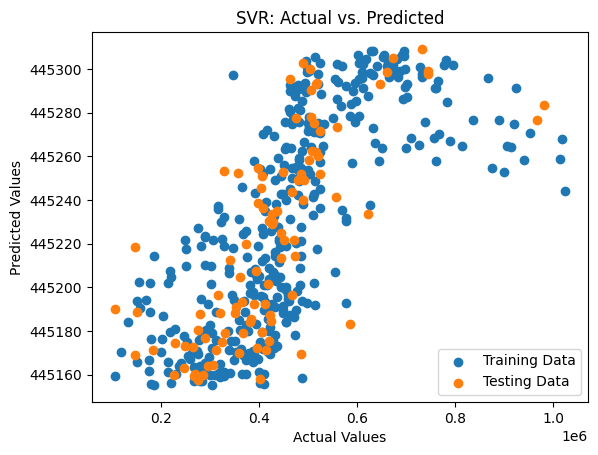

In [46]:
from sklearn.svm import SVR

# Create an instance of the SVR model #
svr_model = SVR()

# Train the model #
svr_model.fit(X_train, y_train)

# Make predictions on the training set #
y_train_pred = svr_model.predict(X_train)

# Make predictions on the test set #
y_test_pred = svr_model.predict(X_test)

# Calculate RMSE for training and testing data
svr_train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
svr_test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

# Calculate R^2 score for training and testing data
svr_train_r2 = r2_score(y_train, y_train_pred)
svr_test_r2 = r2_score(y_test, y_test_pred)

# Print the evaluation metrics
print("Training RMSE:", svr_train_rmse)
print("Testing RMSE:", svr_test_rmse)
print("Training R^2 Score:", svr_train_r2)
print("Testing R^2 Score:", svr_test_r2)



# Create a scatter plot for training data
plt.scatter(y_train, y_train_pred, label="Training Data")

# Create a scatter plot for testing data
plt.scatter(y_test, y_test_pred, label="Testing Data")

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("SVR: Actual vs. Predicted")
plt.legend()
plt.show()

The is the SVR model, or Support Vector Regression. It is a machine learning algorithm used for regression tasks. It is based on Support Vector Machines (SVM) and aims to find a hyperplane that best fits the training data while maximizing the margin.

In SVR, the algorithm maps the input features to a higher-dimensional space using a kernel function. It then finds a hyperplane that passes through as many data points as possible, while also minimizing the error within a specified margin or tolerance. The SVR model seeks to find a balance between achieving a small margin and allowing some instances to fall outside the margin to account for noise or outliers in the data.

The rest of the data can be intrepreted as usual.

Training RMSE: 54812.40019876095
Testing RMSE: 62118.71929187291
Training R^2 Score: 0.8939742023412827
Testing R^2 Score: 0.8244241701493289


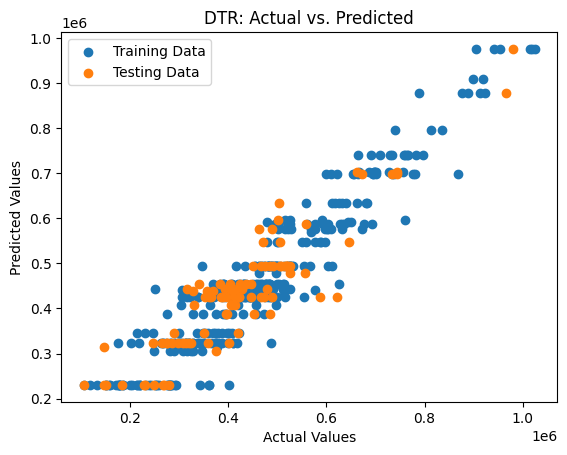

In [47]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Create an instance of the Decision Tree Regressor model with desired parameters #
dtr_model = DecisionTreeRegressor(random_state=42, max_depth=5, min_samples_split=5)

# Train the model #
dtr_model.fit(X_train, y_train)

# Make predictions on the training set #
y_train_pred = dtr_model.predict(X_train)

# Make predictions on the test set #
y_test_pred = dtr_model.predict(X_test)

# Calculate RMSE for training and testing data
dt_train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
dt_test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

# Calculate R^2 score for training and testing data
dt_train_r2 = r2_score(y_train, y_train_pred)
dt_test_r2 = r2_score(y_test, y_test_pred)

# Print the evaluation metrics
print("Training RMSE:", dt_train_rmse)
print("Testing RMSE:", dt_test_rmse)
print("Training R^2 Score:", dt_train_r2)
print("Testing R^2 Score:", dt_test_r2)


# Create a scatter plot for training data
plt.scatter(y_train, y_train_pred, label="Training Data")

# Create a scatter plot for testing data
plt.scatter(y_test, y_test_pred, label="Testing Data")

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("DTR: Actual vs. Predicted")
plt.legend()
plt.show()


The Decision Tree Regressor (DTR) is a machine learning algorithm used for regression tasks. During training, the DTR algorithm searches for the best feature and value to split the data, optimizing a criterion such as mean squared error (MSE) or mean absolute error (MAE). Once the tree is constructed, predictions are made by traversing the tree from the root to the leaf node based on the feature values of the input data. In summary, the DTR algorithm creates a binary decision tree based on feature splits, allowing for non-linear relationships between the features and the target variable. It predicts the target variable by following a path through the decision tree based on the feature values of the input data.

In [48]:
from sklearn.metrics import mean_squared_error, r2_score

# Create a list to store the models and their evaluation metrics
models = [linear_model, rf_model, gb_model, svr_model, dtr_model]
model_names = ['Linear Regression', 'Random Forest', 'Gradient Boosting', 'SVR', 'Decision Tree']

# Initialize lists to store the evaluation metrics
rmse_train = []
rmse_test = []
r2_train = []
r2_test = []

# Evaluate each model
for model, name in zip(models, model_names):
    # Make predictions on the training set
    y_train_pred = model.predict(X_train)

    # Make predictions on the test set
    y_test_pred = model.predict(X_test)

    # Calculate RMSE for training and testing data
    rmse_train.append(np.sqrt(mean_squared_error(y_train, y_train_pred)))
    rmse_test.append(np.sqrt(mean_squared_error(y_test, y_test_pred)))

    # Calculate R^2 score for training and testing data
    r2_train.append(r2_score(y_train, y_train_pred))
    r2_test.append(r2_score(y_test, y_test_pred))

    # Print the evaluation metrics
    print(f"----- {name} -----")
    print("Training RMSE:", rmse_train[-1])
    print("Testing RMSE:", rmse_test[-1])
    print("Training R^2 Score:", r2_train[-1])
    print("Testing R^2 Score:", r2_test[-1])
    print("------------------")


----- Linear Regression -----
Training RMSE: 89161.17542738309
Testing RMSE: 82395.54332162565
Training R^2 Score: 0.7194530968926247
Testing R^2 Score: 0.6910934003098511
------------------
----- Random Forest -----
Training RMSE: 45608.82774113709
Testing RMSE: 57377.31869824522
Training R^2 Score: 0.9265905908744679
Testing R^2 Score: 0.8502039912392059
------------------
----- Gradient Boosting -----
Training RMSE: 42847.77703941047
Testing RMSE: 58129.924789472425
Training R^2 Score: 0.935209624125557
Testing R^2 Score: 0.8462485340171164
------------------
----- SVR -----
Training RMSE: 169109.7685481049
Testing RMSE: 149622.05023790433
Training R^2 Score: -0.009232665698113651
Testing R^2 Score: -0.01861706160618226
------------------
----- Decision Tree -----
Training RMSE: 54812.40019876095
Testing RMSE: 62118.71929187291
Training R^2 Score: 0.8939742023412827
Testing R^2 Score: 0.8244241701493289
------------------


In [49]:
full_url = 'https://raw.githubusercontent.com/kkeelar1/bostonHousingData/main/BostonHousing.csv'
dff = pd.read_csv(full_url)

Load in new dataset for a dataset with more characteristics for Boston Housing Data to try and get a better model and more accurate predictions.

In [50]:
# Separate the features (X) and target variable (y)
XFull = dff.drop('medv', axis=1)
yFull = dff['medv']


      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  
             crim          zn       indus        chas         nox          rm  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    

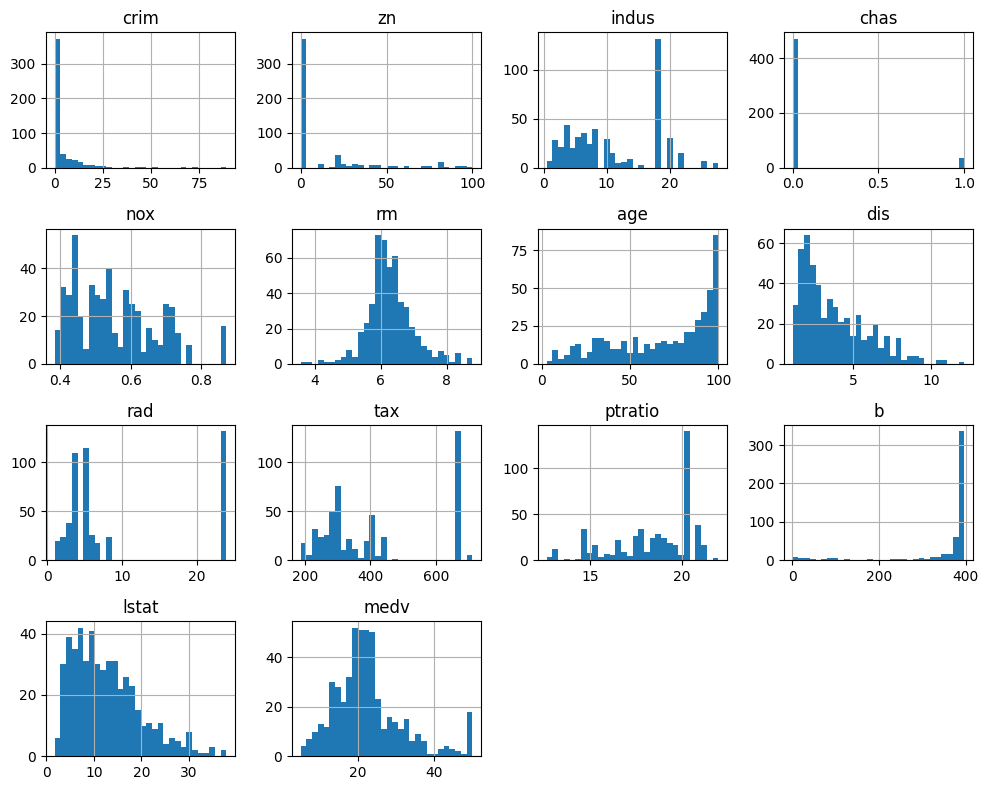

In [51]:
# Simple exploration of the dataset #
print(dff.head())  # Display the first few rows of the DataFrame #
print(dff.describe())  # Summary statistics of the variables #

# Visualize the distributions of variables
dff.hist(figsize=(10, 8), bins=30)
plt.tight_layout()
plt.show()

Simple print out and visualization of data

In [52]:
# Perform feature scaling
scalerFull = StandardScaler()
X_scaledFull = scaler.fit_transform(XFull)

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaledFull, yFull, test_size=0.2, random_state=42)

# Print the shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (404, 13)
X_test shape: (102, 13)
y_train shape: (404,)
y_test shape: (102,)


In [53]:
# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the training data
scaler.fit(X_train)

# Apply the scaler to the training and testing data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [54]:
# Extract the target variable
yFull = dff['medv']

# Extract the feature variables
XFull = dff.drop(['medv'], axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(XFull, yFull, test_size=0.2, random_state=42)

In [55]:
# Split the preprocessed data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaledFull, yFull, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (404, 13)
X_test shape: (102, 13)
y_train shape: (404,)
y_test shape: (102,)


Training RMSE: 4.652033184880168
Testing RMSE: 4.928602182665336
Training R^2 Score: 0.7508856358979672
Testing R^2 Score: 0.668759493535632


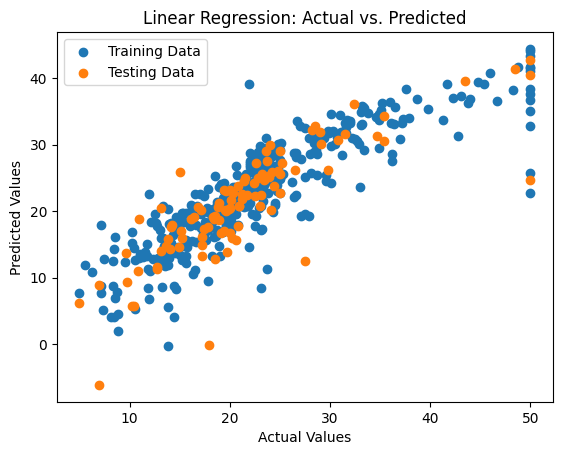

In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Create an instance of the Linear Regression model
lrFull_model = LinearRegression()

# Train the model
lrFull_model.fit(X_train, y_train)

# Make predictions on the training set
y_train_pred = lrFull_model.predict(X_train)

# Make predictions on the test set
y_test_pred = lrFull_model.predict(X_test)

# Evaluate the model
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print the evaluation metrics
print("Training RMSE:", train_rmse)
print("Testing RMSE:", test_rmse)
print("Training R^2 Score:", train_r2)
print("Testing R^2 Score:", test_r2)


# Create a scatter plot for training data
plt.scatter(y_train, y_train_pred, label="Training Data")

# Create a scatter plot for testing data
plt.scatter(y_test, y_test_pred, label="Testing Data")

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Linear Regression: Actual vs. Predicted")
plt.legend()
plt.show()

Linear Regression for the full data set

Training RMSE: 1.4063198444701313
Testing RMSE: 2.8129602438238144
Training R^2 Score: 0.9772342809457157
Testing R^2 Score: 0.8920995891343227


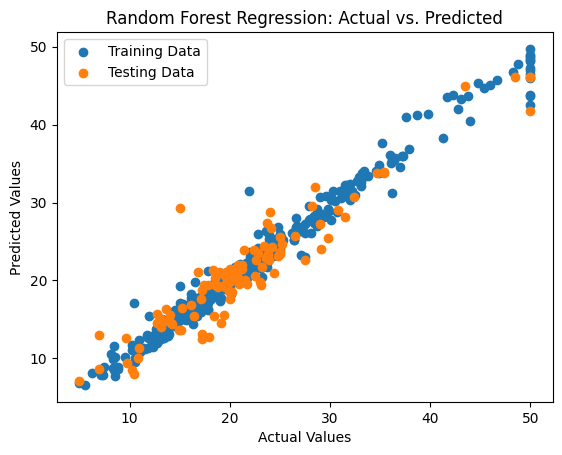

In [57]:
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regression model
rfFull_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rfFull_model.fit(X_train_scaled, y_train)

# Make predictions on training and testing data
y_train_pred = rfFull_model.predict(X_train_scaled)
y_test_pred = rfFull_model.predict(X_test_scaled)

# Calculate RMSE and R^2 score
rf_train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
rf_test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
rf_train_r2 = r2_score(y_train, y_train_pred)
rf_test_r2 = r2_score(y_test, y_test_pred)

print("Training RMSE:", rf_train_rmse)
print("Testing RMSE:", rf_test_rmse)
print("Training R^2 Score:", rf_train_r2)
print("Testing R^2 Score:", rf_test_r2)

# Predict on the test set
y_pred = rfFull_model.predict(X_test)

# Create a scatter plot for training data
plt.scatter(y_train, y_train_pred, label="Training Data")

# Create a scatter plot for testing data
plt.scatter(y_test, y_test_pred, label="Testing Data")

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Random Forest Regression: Actual vs. Predicted")
plt.legend()
plt.show()

Random Forest Regression for full data set

Training RMSE: 1.3171400770790505
Testing RMSE: 2.491621991723557
Training R^2 Score: 0.9800300447996301
Testing R^2 Score: 0.9153435172426863


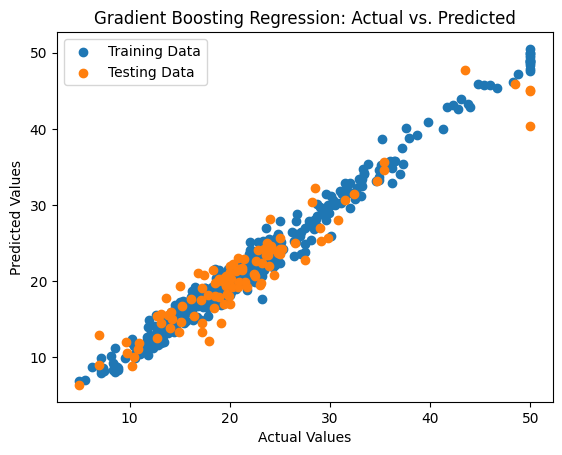

In [58]:
from sklearn.ensemble import GradientBoostingRegressor

# Create a Gradient Boosting Regression model
gbFull_model = GradientBoostingRegressor(random_state=42)

# Train the model
gbFull_model.fit(X_train, y_train)

# Make predictions on training and testing data
y_train_pred = gbFull_model.predict(X_train)
y_test_pred = gbFull_model.predict(X_test)

# Calculate RMSE and R^2 score
gb_train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
gb_test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
gb_train_r2 = r2_score(y_train, y_train_pred)
gb_test_r2 = r2_score(y_test, y_test_pred)

print("Training RMSE:", gb_train_rmse)
print("Testing RMSE:", gb_test_rmse)
print("Training R^2 Score:", gb_train_r2)
print("Testing R^2 Score:", gb_test_r2)

# Predict on the test set
y_pred = gbFull_model.predict(X_test)

# Create a scatter plot for training data
plt.scatter(y_train, y_train_pred, label="Training Data")

# Create a scatter plot for testing data
plt.scatter(y_test, y_test_pred, label="Testing Data")

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Gradient Boosting Regression: Actual vs. Predicted")
plt.legend()
plt.show()

In [59]:

# Create an instance of the Gradient Boosting Regressor model
model = GradientBoostingRegressor()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_test_pred = model.predict(X_test)

# Print the actual and predicted prices of ten houses
num_houses = 10
for i in range(num_houses):
    actual_price = y_test.iloc[i]
    predicted_price = y_test_pred[i]
    print(f"House {i+1}: Actual Price = ${actual_price:.2f}, Predicted Price = ${predicted_price:.2f}")

House 1: Actual Price = $23.60, Predicted Price = $23.45
House 2: Actual Price = $32.40, Predicted Price = $31.46
House 3: Actual Price = $13.60, Predicted Price = $17.37
House 4: Actual Price = $22.80, Predicted Price = $24.02
House 5: Actual Price = $16.10, Predicted Price = $17.68
House 6: Actual Price = $20.00, Predicted Price = $22.03
House 7: Actual Price = $17.80, Predicted Price = $18.15
House 8: Actual Price = $14.00, Predicted Price = $13.83
House 9: Actual Price = $19.60, Predicted Price = $20.62
House 10: Actual Price = $16.80, Predicted Price = $21.04


Gradient boosting regression for the full dataset

Training RMSE: 5.241349799822264
Testing RMSE: 5.068829910015053
Training R^2 Score: 0.683772633372116
Testing R^2 Score: 0.6496425583214102


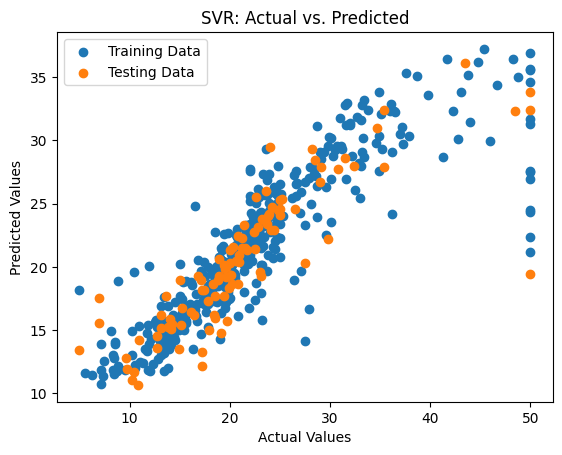

In [60]:
from sklearn.svm import SVR

# Create an instance of the SVR model #
svrFull_model = SVR()

# Train the model #
svrFull_model.fit(X_train, y_train)

# Make predictions on the training set #
y_train_pred = svrFull_model.predict(X_train)

# Make predictions on the test set #
y_test_pred = svrFull_model.predict(X_test)

# Calculate RMSE for training and testing data
svr_train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
svr_test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

# Calculate R^2 score for training and testing data
svr_train_r2 = r2_score(y_train, y_train_pred)
svr_test_r2 = r2_score(y_test, y_test_pred)

# Print the evaluation metrics
print("Training RMSE:", svr_train_rmse)
print("Testing RMSE:", svr_test_rmse)
print("Training R^2 Score:", svr_train_r2)
print("Testing R^2 Score:", svr_test_r2)



# Create a scatter plot for training data
plt.scatter(y_train, y_train_pred, label="Training Data")

# Create a scatter plot for testing data
plt.scatter(y_test, y_test_pred, label="Testing Data")

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("SVR: Actual vs. Predicted")
plt.legend()
plt.show()

Support Vector Regression for full dataset

Training RMSE: 2.8542681220579333
Testing RMSE: 4.225606577450383
Training R^2 Score: 0.9062216264915659
Testing R^2 Score: 0.7565139806253341


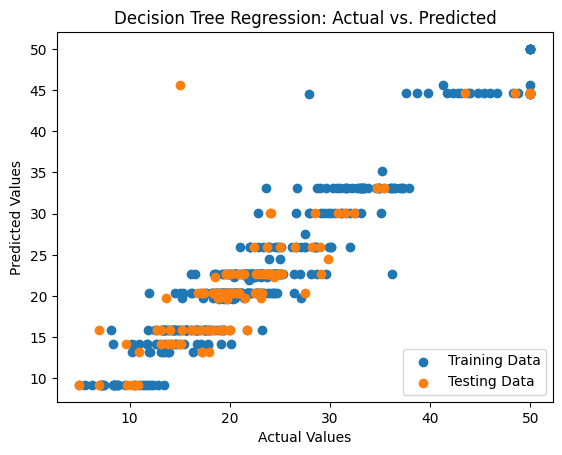

In [61]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Create an instance of the Decision Tree Regressor model with desired parameters #
dtrFull_model = DecisionTreeRegressor(random_state=42, max_depth=5, min_samples_split=5)

# Train the model #
dtrFull_model.fit(X_train, y_train)

# Make predictions on the training set #
y_train_pred = dtrFull_model.predict(X_train)

# Make predictions on the test set #
y_test_pred = dtrFull_model.predict(X_test)

# Calculate RMSE for training and testing data
dt_train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
dt_test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

# Calculate R^2 score for training and testing data
dt_train_r2 = r2_score(y_train, y_train_pred)
dt_test_r2 = r2_score(y_test, y_test_pred)

# Print the evaluation metrics
print("Training RMSE:", dt_train_rmse)
print("Testing RMSE:", dt_test_rmse)
print("Training R^2 Score:", dt_train_r2)
print("Testing R^2 Score:", dt_test_r2)


# Create a scatter plot for training data
plt.scatter(y_train, y_train_pred, label="Training Data")

# Create a scatter plot for testing data
plt.scatter(y_test, y_test_pred, label="Testing Data")

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Decision Tree Regression: Actual vs. Predicted")
plt.legend()
plt.show()

Training RMSE: 2.8017353091065487
Testing RMSE: 3.5253716537633286
Training R^2 Score: 0.9096418420833605
Testing R^2 Score: 0.8305249673266242


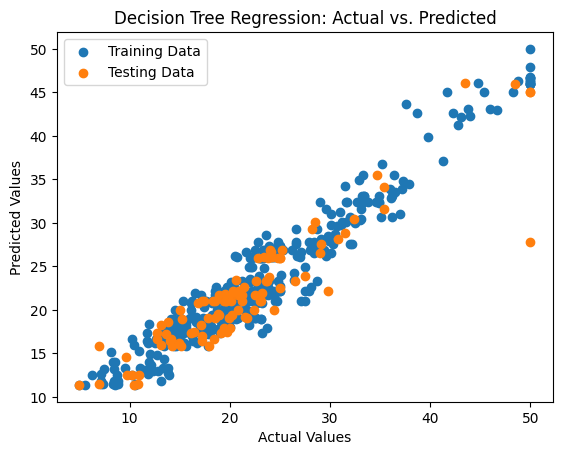

In [62]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Create an instance of the AdaBoostRegressor model
ada_model = AdaBoostRegressor()

# Train the model
ada_model.fit(X_train, y_train)

# Make predictions on the test set
y_test_pred = ada_model.predict(X_test)

# Make predictions on the training set #
y_train_pred = ada_model.predict(X_train)

# Calculate RMSE for training and testing data
ada_train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
ada_test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

# Calculate R^2 score for training and testing data
ada_train_r2 = r2_score(y_train, y_train_pred)
ada_test_r2 = r2_score(y_test, y_test_pred)

# Print the evaluation metrics
print("Training RMSE:", ada_train_rmse)
print("Testing RMSE:", ada_test_rmse)
print("Training R^2 Score:", ada_train_r2)
print("Testing R^2 Score:", ada_test_r2)


# Create a scatter plot for training data
plt.scatter(y_train, y_train_pred, label="Training Data")

# Create a scatter plot for testing data
plt.scatter(y_test, y_test_pred, label="Testing Data")

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Decision Tree Regression: Actual vs. Predicted")
plt.legend()
plt.show()


ADA boosting model: ADA boosting, short for Adaptive Boosting, is an ensemble learning method that combines multiple weak or base learners to create a strong predictive model. In the provided code snippet, the Boston housing dataset is split into training and test sets. An instance of the AdaBoostRegressor model is created, and the model is trained on the training data using the fit() method. Predictions are made on the test set using the predict() method. The model's performance is evaluated using the Root Mean Squared Error (RMSE) and R^2 score. ADA boosting iteratively trains weak models, adjusting the weights of the training instances to focus on the ones that were previously misclassified. By combining the predictions of multiple weak models, ADA boosting aims to improve the overall predictive accuracy and generalization of the model.

Decision tree regression model for the full dataset

In [63]:
from sklearn.metrics import mean_squared_error, r2_score

# Create a list to store the models and their evaluation metrics
modelsFull = [lrFull_model, rfFull_model, gbFull_model, svrFull_model, dtrFull_model, ada_model]
model_namesFull = ['Linear Regression Full', 'Random Forest Full', 'Gradient Boosting Full', 'SVR Full', 'Decision Tree Full', "ADA Boosting Full"]

# Initialize lists to store the evaluation metrics
rmse_train = []
rmse_test = []
r2_train = []
r2_test = []

# Evaluate each model
for model, name in zip(modelsFull, model_namesFull):
    # Make predictions on the training set
    y_train_pred = model.predict(X_train)

    # Make predictions on the test set
    y_test_pred = model.predict(X_test)

    # Calculate RMSE for training and testing data
    rmse_train.append(np.sqrt(mean_squared_error(y_train, y_train_pred)))
    rmse_test.append(np.sqrt(mean_squared_error(y_test, y_test_pred)))

    # Calculate R^2 score for training and testing data
    r2_train.append(r2_score(y_train, y_train_pred))
    r2_test.append(r2_score(y_test, y_test_pred))

    # Print the evaluation metrics
    print(f"----- {name} -----")
    print("Training RMSE:", rmse_train[-1])
    print("Testing RMSE:", rmse_test[-1])
    print("Training R^2 Score:", r2_train[-1])
    print("Testing R^2 Score:", r2_test[-1])
    print("------------------")


----- Linear Regression Full -----
Training RMSE: 4.652033184880168
Testing RMSE: 4.928602182665336
Training R^2 Score: 0.7508856358979672
Testing R^2 Score: 0.668759493535632
------------------
----- Random Forest Full -----
Training RMSE: 2.1195766530415474
Testing RMSE: 2.830791933468131
Training R^2 Score: 0.9482856088296332
Testing R^2 Score: 0.8907272661350457
------------------
----- Gradient Boosting Full -----
Training RMSE: 1.3171400770790505
Testing RMSE: 2.491621991723557
Training R^2 Score: 0.9800300447996301
Testing R^2 Score: 0.9153435172426863
------------------
----- SVR Full -----
Training RMSE: 5.241349799822264
Testing RMSE: 5.068829910015053
Training R^2 Score: 0.683772633372116
Testing R^2 Score: 0.6496425583214102
------------------
----- Decision Tree Full -----
Training RMSE: 2.8542681220579333
Testing RMSE: 4.225606577450383
Training R^2 Score: 0.9062216264915659
Testing R^2 Score: 0.7565139806253341
------------------
----- ADA Boosting Full -----
Training RM

In [64]:
import pandas as pd

# Reread file for the nureal network #
full_url_NN = 'https://raw.githubusercontent.com/kkeelar1/bostonHousingData/main/BostonHousing.csv'
NN_df = pd.read_csv(full_url_NN)

4/4 [==============================] - 0s 2ms/step
Test Loss: 10.61086368560791
Test MAE: 2.198535680770874


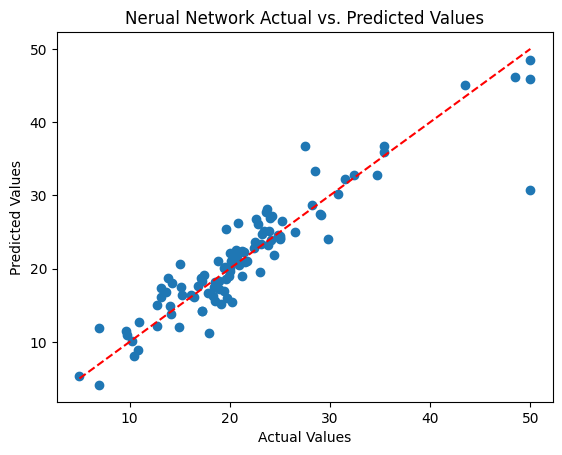

In [65]:
# Developing a nerual network with Keras and tensorflow #
import tensorflow as tf
from tensorflow import keras



# Split the data into features (X) and target variable (y)
X = NN_df.drop('medv', axis=1)
y = NN_df['medv']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Define the model architecture
NN_model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1)
])

# Compile the model
NN_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
NN_model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, verbose=0)

# Evaluate the model
loss, mae = NN_model.evaluate(X_test_scaled, y_test)

# Make predictions
y_pred = NN_model.predict(X_test_scaled)

# Print evaluation metrics
print('Test Loss:', loss)
print('Test MAE:', mae)


# Plot the actual vs predicted values
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')  # Plot the diagonal line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Nerual Network Actual vs. Predicted Values')
plt.show()


This code implements a simple neural network for regression using the Keras library. The model consists of two hidden layers with ReLU activation and an output layer. It is trained using the Adam optimizer and mean squared error loss. The number of epochs is set to 100, and after training, the test loss is evaluated. The code also includes plotting the loss curve to visualize the model's learning progress. Finally, example predictions are printed to compare the actual prices with the model's predictions.

4/4 [==============================] - 0s 4ms/step - loss: 23.3514
Test Loss: 23.351404190063477
4/4 [==============================] - 0s 3ms/step


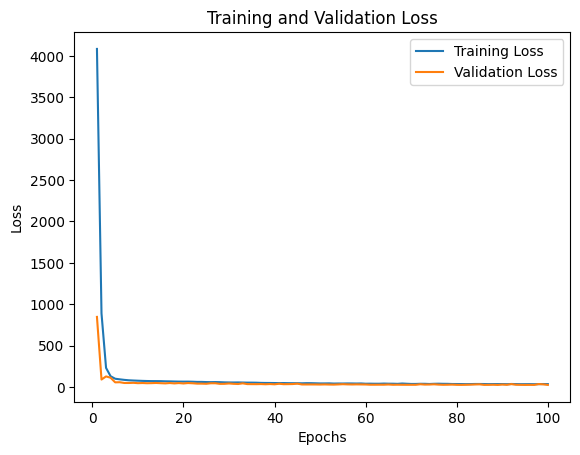

[0.8789548]


In [66]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

# Create the model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(13,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Set the number of epochs
epochs = 100

# Train the model
history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), verbose=0)

# Evaluate the model
test_loss = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)

# Make predictions
y_pred = model.predict(X_test)

# Plot the loss curve
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, epochs + 1)

plt.plot(epochs_range, train_loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

listTotal = []

for i in range(10):
    if ((y_test.iloc[i] / y_pred[i]) < 1):
      sum1 = y_test.iloc[i]/ y_pred[i]
      listTotal.append(sum1)

print (sum(listTotal) / len(listTotal))

In [67]:
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV

# Function to create the neural network model
def create_model():
    model = Sequential()
    model.add(Dense(64, input_dim=13, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

# Create the KerasRegressor wrapper
model = KerasRegressor(build_fn=create_model, verbose=0)

# Define the hyperparameters to tune
param_grid = {'epochs': [50, 100, 150],
              'batch_size': [16, 32, 64]}

# Perform grid search
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid_result = grid.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters: ", grid_result.best_params_)
print("Best Score: ", grid_result.best_score_)

<ipython-input-67-df25de65f940>:14: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasRegressor(build_fn=create_model, verbose=0)


Best Parameters:  {'batch_size': 16, 'epochs': 150}
Best Score:  -28.929880777994793


This code uses the GridSearchCV class from scikit-learn to perform a grid search over the defined hyperparameters (epochs and batch_size). The create_model function creates the neural network model. The best parameters and best score are printed after the grid search. You can modify the hyperparameter grid to include other parameters and values to search over.

4/4 [==============================] - 0s 4ms/step - loss: 30.2024
Test Loss: 30.202373504638672
4/4 [==============================] - 0s 3ms/step


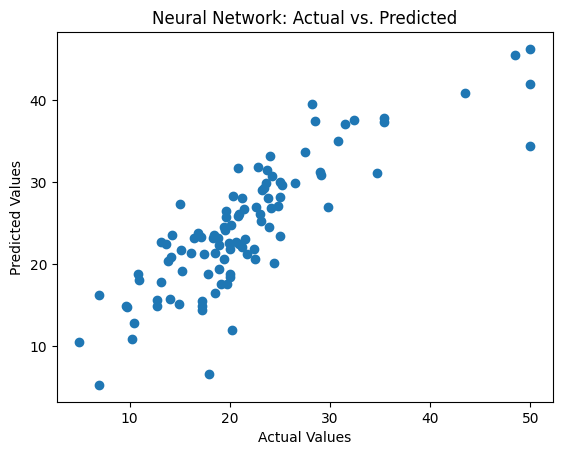

In [68]:
# Create the neural network model with best hyperparameters
model = Sequential()
model.add(Dense(64, input_dim=13, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Retrain the model with best hyperparameters
model.fit(X_train, y_train, batch_size=16, epochs=100, verbose=0)

# Evaluate the model on the testing dataset
test_loss = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)

import matplotlib.pyplot as plt

# Make predictions on the testing dataset
y_pred = model.predict(X_test)

# Create a scatter plot
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Neural Network: Actual vs. Predicted")
plt.show()


In this code, a new instance of the neural network model is created with the best hyperparameters obtained from the grid search. The model is then compiled and retrained using the full training dataset. Finally, the model is evaluated on the testing dataset, and the test loss (mean squared error) is printed as a measure of the model's performance.